In [52]:
%matplotlib widget
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
    


In [53]:

los_error_csv = pd.read_csv(r'../d2s2-simulations/realistic_misalignments/simulation_files/gnd_test4/results/05/LOS/true_LOS_error.csv')
los_error_values = los_error_csv['LOS_deg'].values
HALFSIZE = 150
time_since_start = np.arange(0, len(los_error_values)/5, 0.2)
time_since_start.shape

(4380,)

In [54]:
los_error_diff = np.diff(los_error_values)
center_pass = int(np.median(time_since_start))

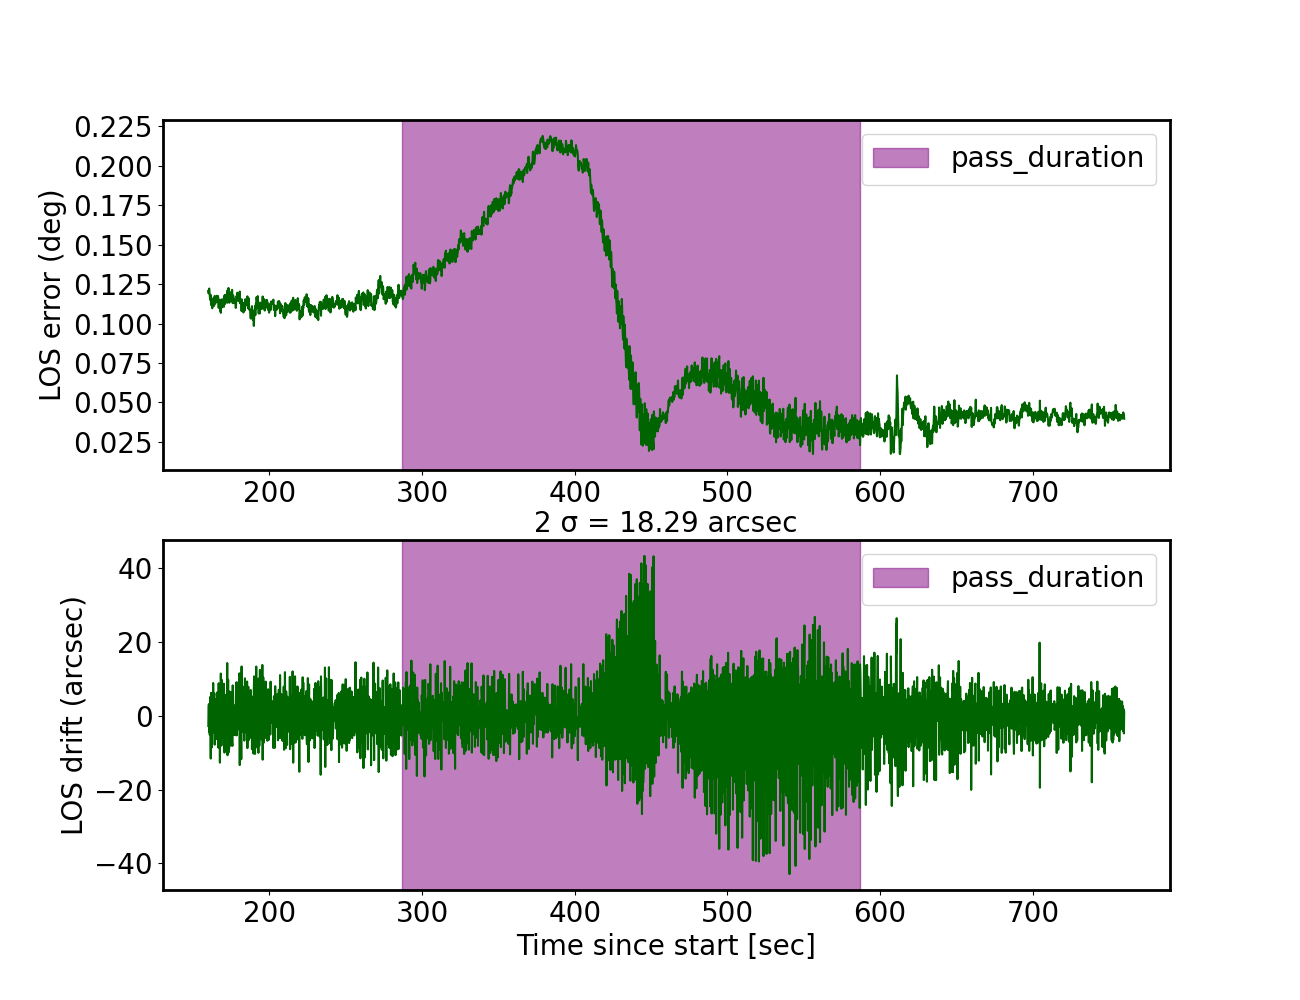

In [55]:
with plt.rc_context({'axes.labelsize': 20 , 'axes.linewidth': 2, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize': 20, 'axes.titlesize': 20}):

    fig, axs = plt.subplots(2, 1, figsize = (13, 10))
    xlimstart, xlim_end = 800, 3800
    axs[0].plot(time_since_start[xlimstart:xlim_end], los_error_values[xlimstart:xlim_end], color = 'darkgreen')
    axs[1].plot(time_since_start[xlimstart:xlim_end], los_error_diff[xlimstart:xlim_end]*60*60/2, color = 'darkgreen')
    axs[0].axvspan(center_pass - HALFSIZE, center_pass + HALFSIZE, alpha = 0.5, color = 'purple', label = 'pass_duration')
    axs[1].axvspan(center_pass - HALFSIZE, center_pass + HALFSIZE, alpha = 0.5, color = 'purple', label = 'pass_duration')
    axs[0].set(ylabel = 'LOS error (deg)')

    axs[1].set(xlabel = 'Time since start [sec]', ylabel = 'LOS drift (arcsec)', title = '2 σ = {:.2f} arcsec'.format(np.quantile(np.abs(los_error_diff[xlimstart:xlim_end])*60*60/2, .95)))


    axs[0].legend()
    axs[1].legend()






Finally, it is worth noting that this is not the best way to calculate the line of sight error drift. The correct method would involve:
- Having the Position of the Satellite in ECI J2000
- Finding the OGS position in the same reference frame, by converting: ($\phi, \lamda$ -> ECEF -> ECI)
- From the Satellite and OGS position, find the vector pointing from the satellite to the OGS, that we can call expected vector
- From the ADCS output quaternion finding the True orientation of the ADCS, and infer the orientation of the selected body pointing vector
- Take the dod product of the ADCS body pointing vector and the expected vector. This will give LOS error
- Take the dot product of 2 sequential dot vectors, this will give the LOS drift. 